In [29]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")
import pandas as pd
import numpy as np
import warnings
import mlflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from modeling.config import EXPERIMENT_NAME
TRACKING_URI = open("../.mlflow_uri").read().strip()

warnings.filterwarnings('ignore')
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# data
df_wikipedia=pd.read_csv("../data/train_wikipedia.csv")
df_civil=pd.read_csv("../data/train_civil.csv")

#df_test=pd.read_csv("../data/test.csv")


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
df_wikipedia.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
df_civil.head(20)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,ur a sh*tty comment.,0.666667,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,hahahahahahahahhha suck it.,0.457627,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [18]:
print("Civil df size: " + str(df_civil.shape) + " with " + str(df_civil['comment_text'].nunique()) + " unique entries")
print("Wikipedia df size: " + str(df_wikipedia.shape) + " with " + str(df_wikipedia['comment_text'].nunique()) + " unique entries")



Civil df size: (1902194, 45) with 1876468 unique entries
Wikipedia df size: (223549, 8) with 223549 unique entries


Check for Empty Texts

In [19]:
df_civil["comment_text"].isnull().sum()

0

In [14]:
df_wikipedia["comment_text"].isnull().sum()

0

Compare toxic with subcategories

In [20]:
df_wikipedia.iloc[:,2:].mean()

toxic            0.095657
severe_toxic     0.008777
obscene          0.054306
threat           0.003082
insult           0.050566
identity_hate    0.009470
dtype: float64

<AxesSubplot:>

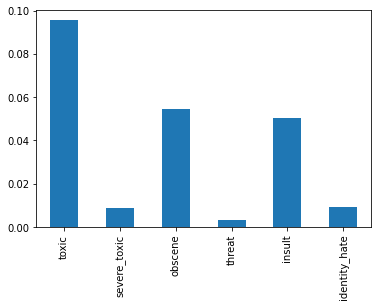

In [21]:
df_wikipedia.iloc[:,2:].mean().plot(kind='bar')

Categories are not mutually exclusive

In [17]:
df_wikipedia.iloc[:,2:].sum(axis=1).unique()

array([0, 4, 1, 3, 2, 5, 6])

Compare Categories to Toxic-Classification

In [22]:
df_wikipedia['toxic_compare'] = df_wikipedia.iloc[:,3:8].sum(axis = 1)#.to_frame().tolist()
df_wikipedia.loc[df_wikipedia['toxic_compare'] > 0,'toxic_compare'] = 1
np.mean(df_wikipedia.toxic == df_wikipedia.toxic_compare)

0.9621559479129855

In [23]:
(df_wikipedia.toxic - df_wikipedia.toxic_compare).value_counts()

 0    215089
 1      7376
-1      1084
dtype: int64

Categories don't always overlap.

### DIstribution of toxicity

<AxesSubplot:>

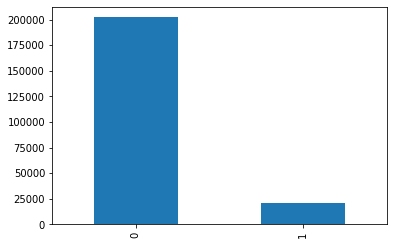

In [24]:
df_wikipedia.toxic.value_counts().plot(kind='bar')
#df_civil.toxic.value_counts()#.plot(kind='bar')

## Define X and y and split

In [66]:
X = df_wikipedia['comment_text']
y = df_wikipedia['toxic']

## Count Vectorizer
### explore rare words

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
223544    :Jerome, I see you never got around to this…! ...
223545    ==Lucky bastard== \n http://wikimediafoundatio...
223546    ==shame on you all!!!== \n\n You want to speak...
223547    MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...
223548    " \n\n == Unicorn lair discovery == \n\n Suppo...
Name: comment_text, Length: 223549, dtype: object

In [42]:
# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X)
# transform the documents in the training data to a document-term matrix
X_vectorized = vect.transform(X)
print("X_vectorized: ")
print(X_vectorized)

X_vectorized: 
  (0, 4719)	1
  (0, 6266)	1
  (0, 7886)	1
  (0, 12163)	1
  (0, 17434)	1
  (0, 21744)	1
  (0, 27636)	1
  (0, 51917)	1
  (0, 70853)	1
  (0, 71005)	1
  (0, 75068)	1
  (0, 82354)	1
  (0, 83202)	1
  (0, 84042)	1
  (0, 90377)	1
  (0, 92804)	1
  (0, 101880)	1
  (0, 121481)	1
  (0, 136987)	1
  (0, 143696)	1
  (0, 150854)	1
  (0, 154608)	1
  (0, 157917)	1
  (0, 161273)	1
  (0, 165030)	1
  :	:
  (223548, 68812)	1
  (223548, 71079)	1
  (223548, 86606)	1
  (223548, 96536)	1
  (223548, 102303)	1
  (223548, 111750)	1
  (223548, 113992)	1
  (223548, 116269)	1
  (223548, 116884)	2
  (223548, 125226)	1
  (223548, 126935)	1
  (223548, 129209)	3
  (223548, 157309)	1
  (223548, 160086)	1
  (223548, 179946)	1
  (223548, 181105)	1
  (223548, 190315)	1
  (223548, 201239)	1
  (223548, 213768)	3
  (223548, 219865)	1
  (223548, 222921)	1
  (223548, 230284)	3
  (223548, 240562)	1
  (223548, 240887)	1
  (223548, 243048)	1


(index in X, index of unique word): count

In [65]:
# test
m = np.array([[1,0,0],[0,0,1],[1,1,0]])
mT = m.T
#mT[1]

In [43]:
# No stop words are used yet
vect.stop_words_ 

set()

Unique Words and their indices:

In [56]:
# get word from index
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]
get_term(vect.vocabulary_, 2)

'0000'

In [44]:
vect.vocabulary_

{'explanation': 82354,
 'why': 241038,
 'the': 219865,
 'edits': 75068,
 'made': 136987,
 'under': 229514,
 'my': 150854,
 'username': 232476,
 'hardcore': 101880,
 'metallica': 143696,
 'fan': 84042,
 'were': 239978,
 'reverted': 188387,
 'they': 220775,
 'weren': 239988,
 'vandalisms': 233678,
 'just': 121481,
 'closure': 51917,
 'on': 161273,
 'some': 205998,
 'gas': 92804,
 'after': 17434,
 'voted': 237286,
 'at': 27636,
 'new': 154608,
 'york': 247051,
 'dolls': 70853,
 'fac': 83202,
 'and': 21744,
 'please': 172207,
 'don': 71005,
 'remove': 186456,
 'template': 218518,
 'from': 90377,
 'talk': 216514,
 'page': 165030,
 'since': 202669,
 'retired': 188078,
 'now': 157917,
 '89': 12163,
 '205': 4719,
 '38': 7886,
 '27': 6266,
 'aww': 29520,
 'he': 103018,
 'matches': 140385,
 'this': 221035,
 'background': 30328,
 'colour': 53301,
 'seemingly': 197712,
 'stuck': 211564,
 'with': 243048,
 'thanks': 219722,
 '21': 5232,
 '51': 9392,
 'january': 118186,
 '11': 1500,
 '2016': 4573,
 '

In [53]:
sum_words = X_vectorized.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
df_counts = pd.DataFrame.from_records(
    words_freq, columns=['Word', 'Count'])
df_counts.to_csv('../data/wikipedia_word_count_ascending.csv')

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df_counts = pd.DataFrame.from_records(
    words_freq, columns=['Word', 'Count'])
df_counts.to_csv('../data/wikipedia_word_count_descending.csv')

## TfidfVectorizer

In [132]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 15
# This means a word should have been used in at least 15 SMS 
vect = TfidfVectorizer(min_df=15).fit(X_train)

# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

# let's look of some of the words gathered with this method
sorted(vect.vocabulary_.items(), key=lambda x: x[1])[500:510]

[('abortion', 500),
 ('abortions', 501),
 ('about', 502),
 ('above', 503),
 ('abraham', 504),
 ('abrahamic', 505),
 ('abrasive', 506),
 ('abroad', 507),
 ('absence', 508),
 ('absent', 509)]

(word, index)

## Lemmatization

In [133]:
# Initialization
nltk.download('wordnet')
nltk.download('omw-1.4')
WNlemma = nltk.WordNetLemmatizer()
#analyzer = CountVectorizer().build_analyzer()
analyzer = TfidfVectorizer(min_df=1).build_analyzer()

def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

#lemm_vectorizer = CountVectorizer(analyzer=lemmatize_word)
lemm_vectorizer = TfidfVectorizer(min_df=1, analyzer=lemmatize_word)

# Transform X_train
X_train_lemm_vectorized = lemm_vectorizer.fit_transform(X_train)

[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [134]:
X_train_lemm_vectorized.shape

(111699, 144551)

In [148]:
print(X_train_lemm_vectorized)
# let's look of some of the words gathered with this method
sorted(lemm_vectorizer.vocabulary_.items(), key=lambda x: x[1])[500:510]

  (0, 124179)	0.054128738562137256
  (0, 126018)	0.036637448262929834
  (0, 92161)	0.1638388850761638
  (0, 33682)	0.10141208614067083
  (0, 114172)	0.09751106263782336
  (0, 108503)	0.07795984519353659
  (0, 123127)	0.17548840296935067
  (0, 54150)	0.09984447053743528
  (0, 39960)	0.20361739835230844
  (0, 139265)	0.15908881096471528
  (0, 43863)	0.1477832273318086
  (0, 31251)	0.13712280725306447
  (0, 24941)	0.05432195966139286
  (0, 107668)	0.10328151520980412
  (0, 44218)	0.1301644668230186
  (0, 136205)	0.05174213582130525
  (0, 135963)	0.11590957524629071
  (0, 32057)	0.14305578256336846
  (0, 29942)	0.13763387883279526
  (0, 61917)	0.06614472686818265
  (0, 72538)	0.06502466904710358
  (0, 41312)	0.06176943607147921
  (0, 126876)	0.08014325781931798
  (0, 81991)	0.09499715357845281
  (0, 127805)	0.05948099469425175
  :	:
  (111698, 78443)	0.12450139967417409
  (111698, 141682)	0.05455388890465438
  (111698, 14564)	0.07360012980705137
  (111698, 63357)	0.07580986454742801
  (111

[('0cfuq6aewbw', 500),
 ('0cfwq6aewcq', 501),
 ('0cgaq6aewca', 502),
 ('0e394f018fc9ff00vgnvcm1000002c567798rcrd', 503),
 ('0em', 504),
 ('0f', 505),
 ('0f78', 506),
 ('0fb3382ee6ad1e46', 507),
 ('0h', 508),
 ('0j0i10l9', 509)]

In [141]:
sorted(lemm_vectorizer.vocabulary_)

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000001',
 '000001',
 '000002',
 '000002000004000008000016',
 '0000030422',
 '0000035',
 '000023405011',
 '00004',
 '000045',
 '00007632',
 '000080',
 '00008b',
 '00009c',
 '0000z',
 '0001',
 '00012',
 '000131088',
 '0002tree',
 '0003',
 '000352',
 '0004',
 '000500',
 '0006',
 '000_bucks',
 '000b01c5b9f8',
 '000feet',
 '000ft',
 '000http',
 '000hz',
 '000k',
 '000km',
 '000lb',
 '000poland2',
 '000s',
 '000shp',
 '000soviet',
 '000th',
 '000unknownunknown',
 '000unknownunknownhungary',
 '000unknownunknownitaly',
 '000unknownunknownromania3',
 '000unknownunknowntotal',
 '000v',
 '000z',
 '001',
 '0010',
 '0011',
 '001200405140111',
 '0014',
 '00144feab7de',
 '0015',
 '0016',
 '0018',
 '002',
 '0020143',
 '00242',
 '0025',
 '00262',
 '002912',
 '00293',
 '003',
 '0032',
 '00336',
 '0034',
 '003417',
 '003_resize',
 '004',
 '00402',
 '0042',
 '0049703',
 '005',
 '005003',
 '005113',
 '005176',
 '0052',
 '0055',
 '0055bb',
 '0058',
 '006',
 '

One example word

In [138]:
lemm_vectorizer.get_feature_names()[50321]

'firday'

--> We may need to correct for spelling errors

Let's look at rare words

In [150]:
# lowest occurrences
sort(X_train_lemm_vectorized)

NameError: name 'sort' is not defined

In [142]:
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]

get_term(lemm_vectorizer.vocabulary_, 8)

'000002000004000008000016'

In [ ]:
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]
#get_term(vectorizer.vocabulary_, 8)


In [85]:
print("X_train shape = {}".format(X_train.shape))
print("Vocabulary length = {}".format(len(vect.vocabulary_)))

X_train shape = (111699,)
Vocabulary length = 153049


In [86]:
sorted(vect.vocabulary_.items(), key=lambda x: x[1])[:20]
print(X_train_vectorized.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## First Models

In [87]:
# Train the model
model = LogisticRegression(max_iter=1500)
model.fit(X_train_vectorized, y_train)

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print("AUC = {:.3f}".format(roc_auc_score(y_test, predictions)))

AUC = 0.829


In [88]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print("Smallest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:10]]))
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['supertr0ll' 'swift' 'showing' 'beardy' 'victoria' 'meta' 'interested'
 'weve' 'kinda' 'talkpage']

Largest Coefs: 
['fuck' 'fucking' 'idiot' 'bullshit' 'suck' 'fucked' 'asshole' 'shit'
 'faggot' 'stupid']
